In [346]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [348]:
data=pd.read_csv('Data/house_data.csv')

In [350]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [352]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [354]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [356]:
data.shape

(21613, 21)

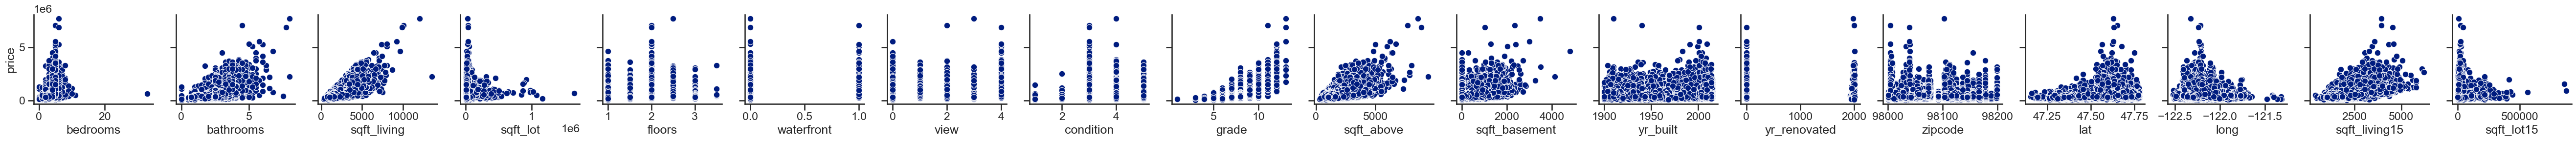

In [358]:
sns.pairplot(data,x_vars=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],
            y_vars='price', height=3, aspect=1, kind='scatter')
plt.show()

In [359]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.date=le.fit_transform(data.date) 

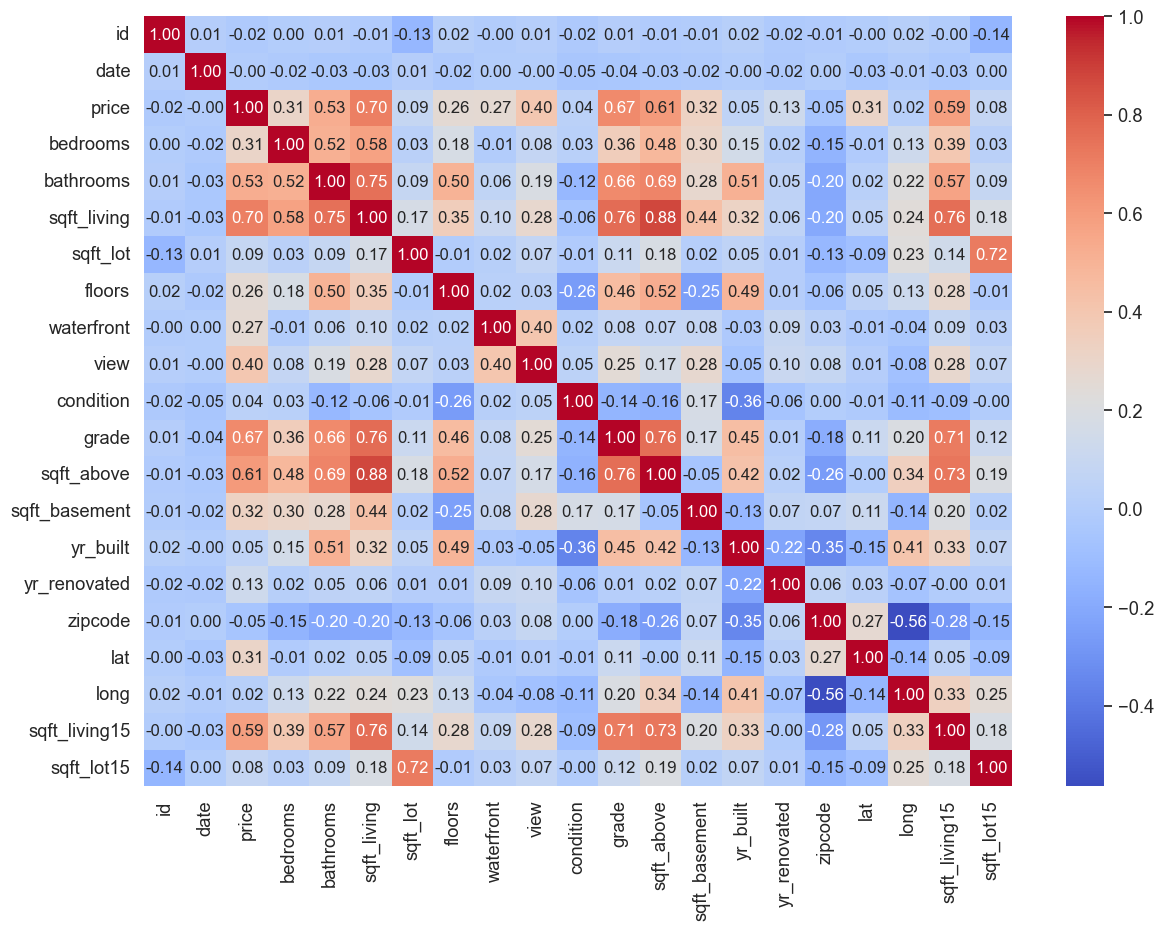

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10)) 

sns.set(font_scale=1.2)  
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 12}, fmt=".2f",  cmap='coolwarm')

plt.show()

In [314]:
x_all = data[['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms']]
y_all=data.price

In [316]:
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [322]:
X_train_all

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
6325,1.75,1780,9,1780,2750
13473,1.00,1000,6,800,1270
17614,1.00,1080,6,990,1170
16970,2.25,2090,7,1280,1800
20868,2.50,1741,8,1446,2090
...,...,...,...,...,...
11964,1.50,1000,7,1000,1000
21575,2.50,3087,8,3087,2927
5390,2.50,2120,7,2120,1690
860,0.75,380,5,380,1170


In [324]:
X_test_all

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
735,2.25,2070,8,2070,2390
2830,3.00,2900,8,1830,2370
4106,2.50,3770,11,3770,3710
16218,3.50,4560,12,4560,4050
19964,2.50,2550,9,2550,2250
...,...,...,...,...,...
13674,1.75,1250,7,1250,1340
20377,2.75,2830,8,2830,2160
8805,2.50,2434,8,2434,2434
10168,1.75,2250,8,2250,2050


In [326]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_all,y_train_all)
y_train_all_pred = lr.predict(X_train_all)
y_test_all_pred=lr.predict(X_test_all)

In [328]:
import sklearn.metrics as metrics
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

In [330]:
print("Result on Train Data with ALL:")
evaluate(y_train_all,y_train_all_pred)

Result on Train Data with ALL:
R Squared :  0.5429627786561299
Mean Absolute Error :  160208.86538246163
Mean Squared Error :  59789536775.214935
Root Mean Squared Error :  244518.99062284495


In [332]:
print("Result on Test Data with ALL:")
evaluate(y_test_all,y_test_all_pred)

Result on Test Data with ALL:
R Squared :  0.5481017682465568
Mean Absolute Error :  164625.30272319532
Mean Squared Error :  68396922757.50506
Root Mean Squared Error :  261528.05348089343


In [334]:
df_all = pd.DataFrame({'Actual': y_test_all, 'Predicted': y_test_all_pred.flatten()})

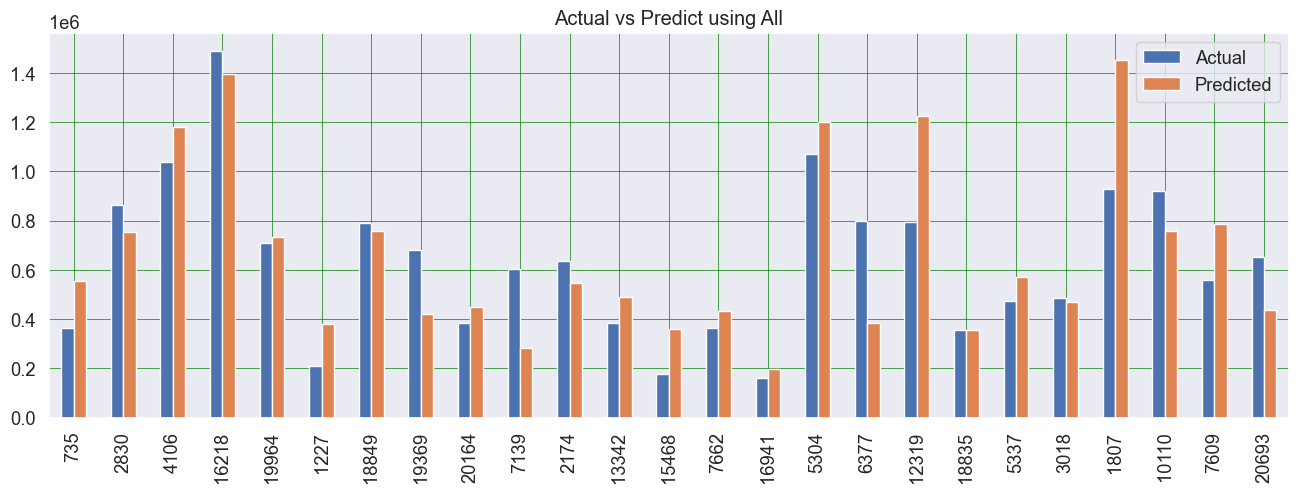

In [336]:
df2 = df_all.head(25)
df2.plot(kind='bar',figsize=(16,5), title='Actual vs Predict using All')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

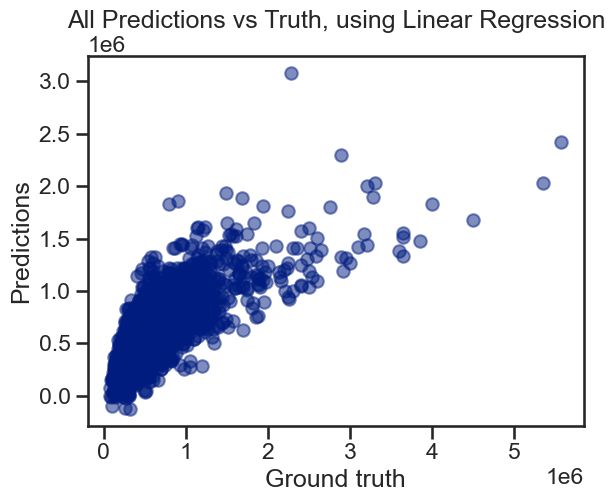

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_all, y_test_all_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='All Predictions vs Truth, using Linear Regression');